In [13]:
import numpy as np
import os
from functools import reduce
import pandas as pd

import matplotlib.pyplot as plt

# 设置文字、字体
from pylab import *  # 支持中文

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体以便支持中文
# mpl.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['axes.unicode_minus'] = False  # 正常显示负号

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = True

# mpl.rcParams['font.size'] = 12
font = {'family': 'SimHei',
        'weight': 'normal',
        'size': 10}

font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 12}
font_leng = {'family': 'Times New Roman',
             'weight': 'normal',
             'size': 10}

import warnings

warnings.filterwarnings('ignore')  # 取消警告


In [14]:
def polt_line(axes,  # 图块
              x,  # x轴数据
              y,  # y轴数据
              label,  # 曲线标签
              x_label=None,  # x轴标签
              x_tickslabel=None,  # x轴刻度标签
              y_label=None,  # y轴标签
              y_tickslabel=None,  # y轴刻度标签
              xlims=None,  # x轴范围
              ylims=None,  # y轴范围
              title=None,  # 图片标题
              point=None,  # 点的形状
              color=None):  # 颜色
    if xlims: axes.set_xlim(xlims[0], xlims[1])
    if ylims: axes.set_ylim(ylims[0], ylims[1])
    if y_label: axes.set_ylabel(y_label, font)  # font调整字体
    if x_label: axes.set_xlabel(x_label, font1)

    axes.set_xticks(x)

    if x_tickslabel: axes.set_xticklabels(x_tickslabel, font)
    if y_tickslabel: axes.set_yticklabels(y_tickslabel, font)
    if title: axes.set_title(title, font)

    axes.grid(axis="y")

    bwith = 1  # 图边框粗细
    bcolor = 'black'  # 图边框颜色
    axes.spines['bottom'].set_linewidth(bwith)
    axes.spines['left'].set_linewidth(bwith)
    axes.spines['top'].set_linewidth(bwith)
    axes.spines['right'].set_linewidth(bwith)
    axes.spines['bottom'].set_color(bcolor)
    axes.spines['left'].set_color(bcolor)
    axes.spines['top'].set_color(bcolor)
    axes.spines['right'].set_color(bcolor)
    #     print(ylims)
    #     if text: axes.text(text_axis[0], text_axis[1], text, ha='left', size=14, color="k", weight="light", bbox=dict(facecolor="w", alpha=0.1))

    axes.plot(x, y, point,
              linestyle='-',
              label=label,
              color=color,
              markerfacecolor=color,  # 点颜色
              ms=7,  # 点大小
              linewidth=1.,  # 线宽度
              markeredgecolor='white')  # 点轮廓线
    #         all_axes[i].plot(x, all_datas['enhance'][cdm], label=cdms[j], color=colors[j], markerfacecolor='none', ms=3, linewidth=0.9)
    #         all_axes[i].legend()


In [15]:
# 绘图参数 & 公共参数
colors = ['purple', '#E5AE48', 'blue']
points = ['o-', 'P-', 's-', '^-', 'x-']

metric_list = ['AUC', 'AP']

In [16]:
# data 1
datasets = ['Cora', 'Citeseer', 'Pubmed', 'Facebook', 'Github']

cora_auc_lambda = [0.9495, 0.9541, 0.9605, 0.9555, 0.9406, 0.9095, 0.8781]
cora_ap_lambda = [0.9507, 0.9568, 0.9628, 0.9563, 0.9418, 0.9095, 0.8740]
# ,,,,
citeseer_auc_lambda = [0.9307, 0.9335, 0.9450, 0.9426, 0.9167, 0.8723, 0.8313]
citeseer_ap_lambda = [0.9383, 0.9400, 0.9520, 0.9501, 0.9266, 0.8759, 0.8378]
# ,,,,
pubmed_auc_lambda = [0.9752, 0.9779, 0.9808, 0.9811, 0.9812, 0.9761, 0.9619]
pubmed_ap_lambda = [0.9692, 0.9771, 0.9759, 0.9777, 0.9794, 0.9731, 0.9541]
#
facebook_auc_lambda = [0.9323, 0.9456, 0.9218, 0.9098, 0.9111, 0.9106, 0.9088, 0.9067, 0.9049]
facebook_ap_lambda = [0.9367, 0.9494, 0.9260, 0.9105, 0.9124, 0.9119, 0.9081, 0.9074, 0.9058]

github_auc_lambda = [0.7407, 0.7741, 0.7350, 0.7157, 0.7392, 0.7626, 0.7837, 0.7963, 0.8183]
github_ap_lambda = [0.7294, 0.7620, 0.7316, 0.7021, 0.7247, 0.7521, 0.7836, 0.7968, 0.8184]

data_auc_lambda = [cora_auc_lambda, citeseer_auc_lambda, pubmed_auc_lambda, facebook_auc_lambda, github_auc_lambda]
data_ap_lambda = [cora_ap_lambda, citeseer_ap_lambda, pubmed_ap_lambda, facebook_ap_lambda, github_ap_lambda]

x1 = np.arange(1, 8, 1)
x1_lims = (0, 9)
x1_ticks_list = [r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', 1, r'$10^1$', r'$10^2$', r'$10^3$']

y1_lims = [0.82, 1.00]
y1_ticks_list = ['0.79', '0.82', '0.85', '0.88', '0.91', '0.94', '0.97', '1.00']

x1_label = 'Trade-off coefficient ' r'$(\lambda)$'
y1_label = 'Metric'


In [17]:
# data 2
cora_auc_trainNum = [0.9595, 0.9552, 0.9530, 0.9505, 0.9443, 0.9311, 0.9156, 0.8990, 0.8704, 0.8593]
cora_ap_trainNum = [0.9633, 0.9567, 0.9528, 0.9506, 0.9446, 0.9277, 0.9128, 0.8942, 0.8523, 0.8437]

citeseer_auc_trainNum = [0.9474, 0.9436, 0.9421, 0.9436, 0.9441, 0.9440, 0.9443, 0.9445, 0.9432, 0.9423]
citeseer_ap_trainNum = [0.9524, 0.9508, 0.9494, 0.9504, 0.9500, 0.9516, 0.9511, 0.9515, 0.9499, 0.9494]

pubmed_auc_trainNum = [0.9836, 0.9813, 0.9813, 0.9817, 0.9821, 0.9807, 0.9819, 0.9812, 0.9803, 0.9818]
pubmed_ap_trainNum = [0.9825, 0.9773, 0.9779, 0.9784, 0.9796, 0.9769, 0.9787, 0.9777, 0.9773, 0.9782]

facebook_auc_trainNum = [0.9323, 0.9456, 0.9218, 0.9098, 0.9111, 0.9106, 0.9088, 0.9067, 0.9049]
facebook_ap_trainNum = [0.9367, 0.9494, 0.9260, 0.9105, 0.9124, 0.9119, 0.9081, 0.9074, 0.9058]

github_auc_trainNum = [0.7407, 0.7741, 0.7350, 0.7157, 0.7392, 0.7626, 0.7837, 0.7963, 0.8183]
github_ap_trainNum = [0.7294, 0.7620, 0.7316, 0.7021, 0.7247, 0.7521, 0.7836, 0.7968, 0.8184]

data_auc_trainNum = [cora_auc_trainNum, citeseer_auc_trainNum, pubmed_auc_trainNum, facebook_auc_trainNum, github_auc_trainNum]
data_ap_trainNum = [cora_ap_trainNum, citeseer_ap_trainNum, pubmed_ap_trainNum, facebook_ap_trainNum, github_ap_trainNum]

x2 = np.arange(1, 11, 1)
x2_lims = (0, 12)
x2_ticks_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

y2_lims = [0.82, 1.00]
y2_ticks_list = ['0.79', '0.82', '0.85', '0.88', '0.91', '0.94', '0.97', '1.00']

x2_label = 'Scale of training set'
y2_label = 'Metric'

In [18]:
# data 3
cora_auc_sizeNum = [0.9513, 0.9518, 0.9522, 0.9534, 0.9533, 0.9528, 0.9557, 0.9560, 0.9562]
cora_ap_sizeNum = [0.9520, 0.9543, 0.9554, 0.9560, 0.9556, 0.9555, 0.9591, 0.9572, 0.9579]

citeseer_auc_sizeNum = [0.9375, 0.9401, 0.9404, 0.9402, 0.9418, 0.9444, 0.9425, 0.9428, 0.9442]
citeseer_ap_sizeNum = [0.9476, 0.9497, 0.9492, 0.9485, 0.9497, 0.9519, 0.9498, 0.9511, 0.9524]

pubmed_auc_sizeNum = [0.9745, 0.9766, 0.9767, 0.9771, 0.9794, 0.9788, 0.9821, 0.9816, 0.9816]
pubmed_ap_sizeNum = [0.9730, 0.9756, 0.9741, 0.9732, 0.9770, 0.9753, 0.9797, 0.9791, 0.9791]
facebook_auc_sizeNum = [0.9323, 0.9456, 0.9218, 0.9098, 0.9111, 0.9106, 0.9088, 0.9067, 0.9049]
facebook_ap_sizeNum = [0.9367, 0.9494, 0.9260, 0.9105, 0.9124, 0.9119, 0.9081, 0.9074, 0.9058]

github_auc_sizeNum = [0.7407, 0.7741, 0.7350, 0.7157, 0.7392, 0.7626, 0.7837, 0.7963, 0.8183]
github_ap_sizeNum = [0.7294, 0.7620, 0.7316, 0.7021, 0.7247, 0.7521, 0.7836, 0.7968, 0.8184]

data_auc_sizeNum = [cora_auc_sizeNum, citeseer_auc_sizeNum, pubmed_auc_sizeNum, facebook_auc_sizeNum, github_auc_sizeNum]
data_ap_sizeNum = [cora_ap_sizeNum, citeseer_ap_sizeNum, pubmed_ap_sizeNum, facebook_ap_sizeNum, github_ap_sizeNum]

x3 = np.arange(1, 10, 1)
x3_lims = (0, 11)
x3_ticks_list = np.arange(2, 11).tolist()

y3_lims = (0.90, 1.00)
y3_ticks_list = ['0.79', '0.82', '0.85', '0.88', '0.91', '0.94', '0.97', '1.00']

x3_label = 'Number of sampled neighbors\n in hop 1 for each node ' + r'$(K_1)$'
y3_label = 'Metric'

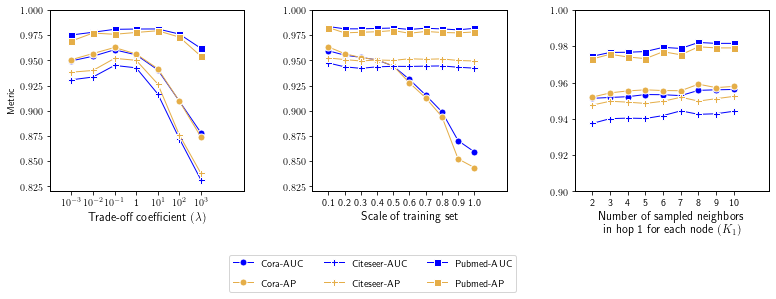

In [20]:
# 画图

fig_1, all_axes_1 = plt.subplots(1, 3, figsize=(11, 3))

# plt.style.use("bmh")
labels = [('Cora-AUC', 'Cora-AP'), ('Citeseer-AUC', 'Citeseer-AP'), ('Pubmed-AUC', 'Pubmed-AP'), ('Facebook-AUC', 'Facebook-AP'),
          ('Github-AUC', 'Github-AP')]

# y_ticks_list = None
for i in range(3):
    polt_line(axes=all_axes_1[0], x=x1, y=data_auc_lambda[i], label=labels[i][0], x_label=x1_label, x_tickslabel=x1_ticks_list,
              y_label='Metric', y_tickslabel=None, ylims=y1_lims, xlims=x1_lims, point=points[i], color=colors[2])
    polt_line(axes=all_axes_1[0], x=x1, y=data_ap_lambda[i], label=labels[i][1], x_label=x1_label, x_tickslabel=x1_ticks_list,
              y_label='Metric', y_tickslabel=None, ylims=y1_lims, xlims=x1_lims, point=points[i], color=colors[1])

for i in range(3):
    polt_line(axes=all_axes_1[1], x=x2, y=data_auc_trainNum[i], label=labels[i][0], x_label=x2_label, x_tickslabel=x2_ticks_list,
              y_label=None, y_tickslabel=None, ylims=y2_lims, xlims=x2_lims, point=points[i], color=colors[2])
    polt_line(axes=all_axes_1[1], x=x2, y=data_ap_trainNum[i], label=labels[i][1], x_label=x2_label, x_tickslabel=x2_ticks_list,
              y_label=None, y_tickslabel=None, ylims=y2_lims, xlims=x2_lims, point=points[i], color=colors[1])

for i in range(3):
    polt_line(axes=all_axes_1[2], x=x3, y=data_auc_sizeNum[i], label=labels[i][0], x_label=x3_label, x_tickslabel=x3_ticks_list,
              y_label=None, y_tickslabel=None, ylims=y3_lims, xlims=x3_lims, point=points[i], color=colors[2])
    polt_line(axes=all_axes_1[2], x=x3, y=data_ap_sizeNum[i], label=labels[i][1], x_label=x3_label, x_tickslabel=x3_ticks_list,
              y_label=None, y_tickslabel=None, ylims=y3_lims, xlims=x3_lims, point=points[i], color=colors[1])

plt.tight_layout(pad=1.5, h_pad=0.18, w_pad=0.26, rect=None)
plt.subplots_adjust(top=1, bottom=0.16, hspace=0.12, wspace=0.35)

all_axes_1[0].legend(bbox_to_anchor=(0.4, -0.7, 2.0, .35), loc='best',
                     ncol=3, mode="", borderaxespad=0., prop=font_leng, labelspacing=1.1)
plt.savefig('image/line-multi.pdf', bbox_inches='tight')

plt.show()